# Fastbook - MNIST basics

## Python

### Por que python es lento?

* Duck typing (+ dynamic types)
* Interpreted rather than compiled
* Inefficient memory access (often)

### ¿Como podemos solucionarlo?
**No usando python**<br>

<img src="https://images-na.ssl-images-amazon.com/images/I/71F5hwVCosL.jpg" style="height: 600px">

# Tensors

In [1]:
import torch

## ¿Que es un tensor?

In [13]:
vector = torch.Tensor([1, 2, 3, 4]) # Vector AKA 1D Tensor
matrix = torch.Tensor([[2, 5, 3, 7],
                       [4, 2, 1, 9]]) # Matrix AKA 2D Tensor
null = torch.zeros((2, 4)) # torch.zero_like(matrix)
ones = torch.ones((4, 4, 2, 1, 3, 5), dtype=torch.uint8)

random = torch.rand((3, 4, 5))

# torch.arange, torch.linspace(0, 1, 30), torch.eye

## Operaciones de tensores

In [42]:
suma = vector + vector
matmul = matrix @ suma
trans = matrix @ matrix.t()
sum_pool = trans.sum(axis=0)
wow = torch.cat((sum_pool, matmul))

torch.Size([2, 4, 1, 1, 1])

mas diversion en: [Documentacion de PyTorch](https://pytorch.org/docs/stable/index.html)


### Broadcasting

In [63]:
x = torch.rand((4, 3))
x + 1

tensor([[1.3764, 1.0361, 1.4088],
        [1.8056, 1.1716, 1.1181],
        [1.7382, 1.7504, 1.1327],
        [1.6445, 1.0777, 1.9167]])

![](https://raw.githubusercontent.com/mgaitan/curso-python-cientifico/edenor/img/image002.gif)

In [64]:
torch.rand(4) + torch.arange(3)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

![](https://raw.githubusercontent.com/mgaitan/curso-python-cientifico/edenor/img/image004.gif)

# Neural Net


### Como computar una prediccion?

### Que parametros posee?

In [ ]:
# Code this stuff (random weights)
# 784 -> 40 -> 1

In [94]:
# Code this stuff (random weights)
# 784 -> 40 -> 1

import torch.nn.functional as F

W1 = torch.rand((784, 40))
b1 = torch.rand(40)

W2 = torch.rand((40, 1))
b2 = torch.rand(1)

x = torch.rand(784)

h1 = F.relu(x @ W1 + b1)
h2 = torch.sigmoid(h1 @ W2 + b2)
loss(h) = 1

W1, b1, W2, b2

31441

# Why this make any sense?

Historical reasons [arxiv:1404.7828](https://arxiv.org/abs/1404.7828)

### Linear transformation
<img src="https://miro.medium.com/max/1000/1*C4yd0OA3fQDRE-2EMgTGqQ.gif" style="height: 550px">

### Non linear transformation
<img src="http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/1layer.gif" style="height: 550px">

### Neural Net
<img src="http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/spiral.1-2.2-2-2-2-2-2.gif" style="height: 550px">


### Neural Net
<img src="http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/spiral.2.2-2-2-2-2-2-2.gif" style="height: 550px">

# Train a Neural Net

## SGD
![](https://thisgirlreina.files.wordpress.com/2018/07/w7aro.png)

![](https://media-cdn.tripadvisor.com/media/photo-s/10/2b/e5/fa/snow-shoeing-on-the-descent.jpg)

# Gradients!
[Oops](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)

# SGD
```
1. Initialize weights randomly 
2. Loop until convergence:
3.    Compute gradients
4.    Update weights
5. return weights
```

# Autograd

In [97]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [98]:
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


In [99]:
print(y.grad_fn)

In [100]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [101]:
# Backprop
a.backward()

In [102]:
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


In [103]:
# Only w that allows gradient accumulation
x = torch.arange(1., 4)
w = torch.ones(3, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [105]:
x = torch.arange(1., 4)
w = torch.ones(3, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x
    
z

tensor(6.)

More fun @ https://pytorch.org/docs/stable/autograd.html

# SGD @ pytorch

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn
from tqdm import trange
import torch

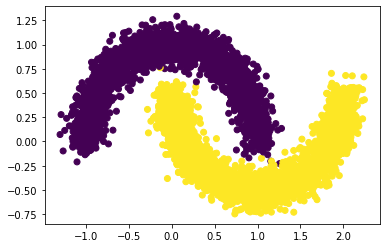

In [4]:
X, y = datasets.make_moons(5000, noise=0.1)
plt.scatter(*X.T, c=y)
X = torch.Tensor(X)
y = torch.Tensor(y)

In [5]:
# Linear model
model = nn.Sequential(
    nn.Linear(2, 100), # x @ W + b (W :: 2 x 100, b :: 100) -> 100
    nn.ReLU(), # :D
    nn.Linear(100, 1), # x @ W + b (W :: 100 x 1, b :: 1) -> 1
    nn.Sigmoid() # :D 
)
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)
X.to(device)
y.to(device);

In [7]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # W - lr * dW

In [8]:
# Training
batch_size = 32

for e in range(15):
    minibatch = trange(0, X.shape[0], batch_size)
    for i in minibatch:
        X_mini = X[i:i + batch_size]
        y_mini = y[i:i + batch_size]
        
        # 1. Feed forward to get the logits
        y_pred = model(X_mini)

        # 2. Compute the loss and accuracy
        loss = criterion(y_pred, y_mini)
        
        with torch.no_grad():
            output = (y_pred > 0.5).float().reshape(-1)
            acc = (y_mini == output).float().mean()

        minibatch.set_description(f'[BATCH]: {i}, [LOSS]: {loss:.6f}, [ACC]: {acc:.3f}')
        minibatch.refresh()

        # 3. zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # 4. Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # 5. Update params
        optimizer.step()

  0%|          | 0/157 [00:00<?, ?it/s]/home/shpotes/anaconda3/envs/torch/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
[BATCH]: 4960, [LOSS]: 0.597360, [ACC]: 0.781:  93%|█████████▎| 146/157 [00:00<00:00, 171.11it/s]/home/shpotes/anaconda3/envs/torch/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
[BATCH]: 4992, [LOSS]: 0.436747, [ACC]: 0.750: 100%|██████████| 157/157 [00:01<00:00, 131.06it/s]


In [17]:
torch.zeros((2, 3, 1, 2, 3))

tensor([[[[[0., 0., 0.],
           [0., 0., 0.]]],


         [[[0., 0., 0.],
           [0., 0., 0.]]],


         [[[0., 0., 0.],
           [0., 0., 0.]]]],



        [[[[0., 0., 0.],
           [0., 0., 0.]]],


         [[[0., 0., 0.],
           [0., 0., 0.]]],


         [[[0., 0., 0.],
           [0., 0., 0.]]]]])

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3\*3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?